# Лекция 4. Кейс-стади. Статистические показатели.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline


In [42]:
a = np.array([1,2,3])
b = np.array([4,2,3])
c = np.array([7,2,3])
d = np.vstack((a,b,c))



array([[3, 1, 2],
       [3, 7, 2],
       [3, 7, 2]])

Загрузим датасет 'Faulty-steel-plates' с kaggle:

In [13]:
# import io
# import requests
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url="faults.csv"
dataset_temp=pd.read_csv(url) 
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


There are 34 fields. The first 27 fields describe some kind of steel plate faults seen in images. Unfortunately, there is no other information that I know of to describe these columns.

*    X_Minimum
*   X_Maximum
*    Y_Minimum
*    Y_Maximum
*    Pixels_Areas
*    X_Perimeter
*    Y_Perimeter
*    Sum_of_Luminosity
*    Minimum_of_Luminosity
*    Maximum_of_Luminosity
*    Length_of_Conveyer
*    TypeOfSteel_A300
*    TypeOfSteel_A400
*    Steel_Plate_Thickness
*    Edges_Index
*    Empty_Index
*    Square_Index
*    Outside_X_Index
*    Edges_X_Index
*    Edges_Y_Index
*    Outside_Global_Index
*    LogOfAreas
*    Log_X_Index
*    Log_Y_Index
*    Orientation_Index
*    Luminosity_Index
*    SigmoidOfAreas

The last seven columns are one hot encoded classes, i.e. if the plate fault is classified as "Stains" there will be a 1 in that column and 0's in the other columns. If you are unfamiliar with one hot encoding, just know that the last seven columns are your class labels.

*    Pastry
*    Z_Scratch
*    K_Scatch
*    Stains
*    Dirtiness
*    Bumps
*    Other_Faults


Первые 27 колонок данной таблицы являются колонками для предсказаний класса.


In [3]:
data = dataset_temp.iloc[:,:27]
data[:4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212



Посмотрим частотный график данных колонок (график histograms):

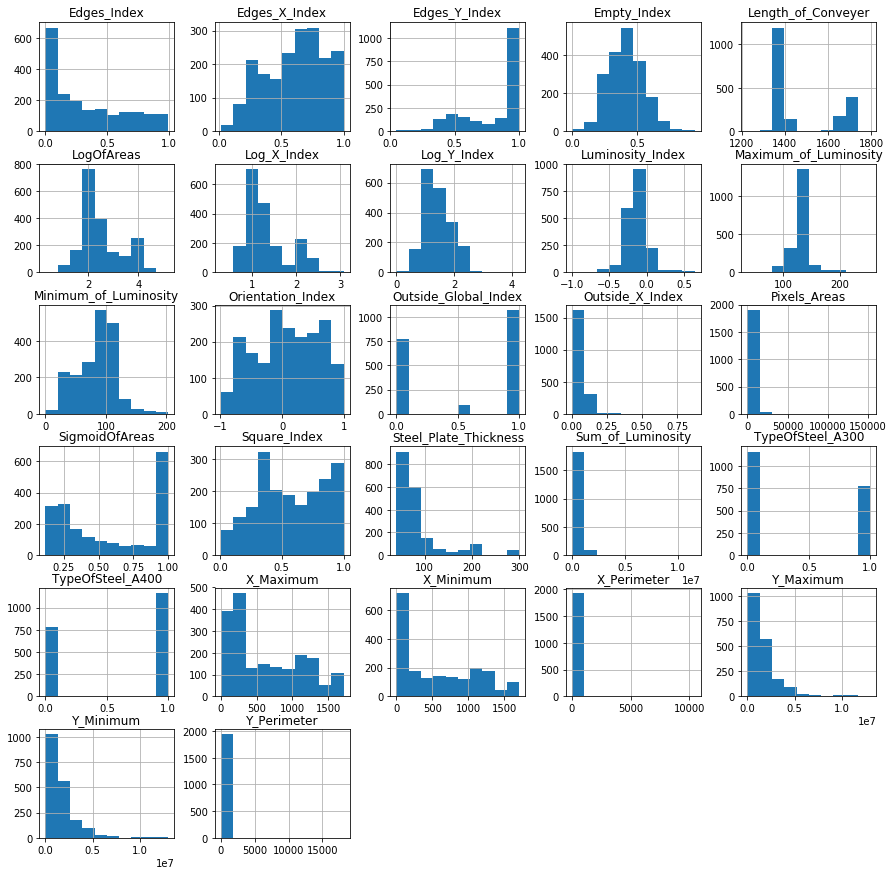

In [4]:

data.hist(figsize=(15,15))
plt.show()


Из данных графиков можно увидеть, что Outside_Global_Index, TypeOfSteel_A300, TypeOfSteel_A400 являются дискретными величинами со значениями [0, 0.5, 1], [0,1], [0,1] соответственно (распределение Бернулли).

Можно также заметить, что такие переменные, как Empty_Index, Log_Y_Index, Luminosity_Index являются нормальным распределением Гаусса.

Выделим колонки в отдельный список

In [ ]:
headers = list(data.columns.values)

Нормализуем параметры

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,0.622575,1.0,-1.0,-0.692308,-0.899920,-0.488293,-0.650096,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,0.622575,1.0,-1.0,-0.692308,0.536777,-0.196313,-0.599476,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,0.396825,1.0,-1.0,-0.538462,0.951367,-0.274076,-0.344560,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,-0.555556,-1.0,1.0,0.923077,0.464429,-0.064943,-0.702934,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,-0.555556,-1.0,1.0,0.115385,-0.860330,-0.049476,-0.883231,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


При нормализации стираются названия колонок, поэтому необходимо восстановить их:

In [7]:
df_norm.columns = headers
df_norm.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,0.622575,1.0,-1.0,-0.692308,-0.899920,-0.488293,-0.650096,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,0.622575,1.0,-1.0,-0.692308,0.536777,-0.196313,-0.599476,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,0.396825,1.0,-1.0,-0.538462,0.951367,-0.274076,-0.344560,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,-0.555556,-1.0,1.0,0.923077,0.464429,-0.064943,-0.702934,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,-0.555556,-1.0,1.0,0.115385,-0.860330,-0.049476,-0.883231,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


Построим матрицу корреляций:

NameError: name 'df_norm' is not defined

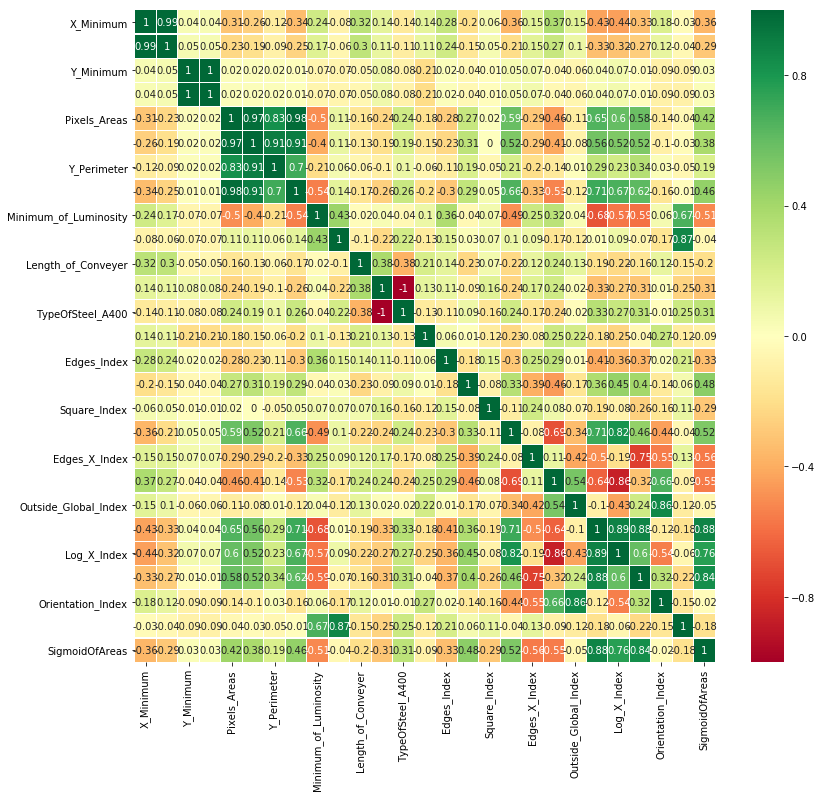

In [10]:
correlation_matrix = df_norm.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

Некоторые переменные сильно коррелированы (например, Sum_of_Luminosity и Pixels_areas)

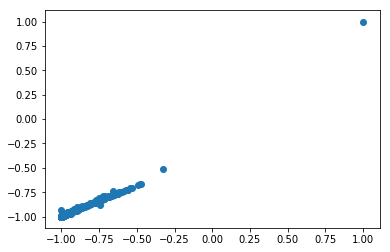

In [9]:
plt.scatter(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])
plt.show()

Корреляция Пирсона

In [12]:
from scipy.stats import pearsonr
pearsonr(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])

(0.9789516167596556, 0.0)

Удалим из таблицы значения с корреляцией, большей чем 95% (например, есть метод **усеченное среднее** - когда удаляем 10% минимальных корреляций и 10% максимальных корреляций, но в нашем случае мы берем только максимальные корреляции)

In [13]:
# создаем матрицу корреляций
corr_matrix = df_norm.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400']


Удаляем колонки, которые не нужны:

In [14]:
df_norm = df_norm.drop(df_norm[to_drop], axis=1)
df_norm.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,-0.488293,-0.650096,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,-0.196313,-0.599476,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,-0.274076,-0.344560,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,-0.064943,-0.702934,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,-0.049476,-0.883231,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


После удаления остается 22 колонки:

In [ ]:
df_norm.shape

(1941, 22)

Посмотреть разбиение по классам. Сколько элементов в каждом классе?

Pastry	Z_Scratch	K_Scatch	Stains	Dirtiness	Bumps	Other_Faults

In [22]:
print('Количество значений 1го класса: ', dataset_temp[dataset_temp['Pastry']==1].shape)
print('Количество значений 2го класса: ', dataset_temp[dataset_temp['Z_Scratch']==1].shape)
print('Количество значений 3го класса: ', dataset_temp[dataset_temp['K_Scatch']==1].shape)
print('Количество значений 4го класса: ', dataset_temp[dataset_temp['Stains']==1].shape)
print('Количество значений 5го класса: ', dataset_temp[dataset_temp['Dirtiness']==1].shape)
print('Количество значений 6го класса: ', dataset_temp[dataset_temp['Bumps']==1].shape)
print('Количество значений 7го класса: ', dataset_temp[dataset_temp['Other_Faults']==1].shape)


Количество значений 1го класса:  (158, 34)
Количество значений 2го класса:  (190, 34)
Количество значений 3го класса:  (391, 34)
Количество значений 4го класса:  (72, 34)
Количество значений 5го класса:  (55, 34)
Количество значений 6го класса:  (402, 34)
Количество значений 7го класса:  (673, 34)


# Датасет Titanic challenge

Соревнования с kaggle: Titanic challenge. 

Данные разделены на 2 файла: 


*   тренировочные данные ('train.csv')
*   тестовые данные ('test.csv')

Тренировочные данные нужны для построения модели. Для тренировочных данных есть показатель класса для каждого пассажира. Модель будет базироваться на таких значениях как пол пассажира и класс. 

Тестовые данные нужны чтобы посмотреть насколько хорошо модель обучена на тренировочных данных. Для тестовых данных нет показателя класса. Вам необходимо найти класс для каждого пассажира. 

Есть также файл 'gender_submission.csv' как показательный файл того, что нужно загружать в качестве ответа.

Считываем данные с kaggle

In [ ]:
url='http://yustiks.ru/titanic/train.csv'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Итак, есть такие данные, как:


*   PassengerId - id пассажира
*   Survived - выжил или нет (1 - да, 0 - нет)
*   Pclass - класс билеты (1 = 1ый, 2 = 2ой, 3 = 3ий)
*   Namee - имя 
*   Sex - пол 
*   Age - возраст
*   SibSp - количество родных или муж/жена на корабле
*   Parch - количество родителей/детей на корабле
*   Ticket - номер билета
*   Cabin - наименование кабины (NaN - если неизвестно)
*   Embarked - порт отправления (C = Cherbourg, Q = Queenstown, S = Southampton).

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Начертим график плотности распределения величин. 

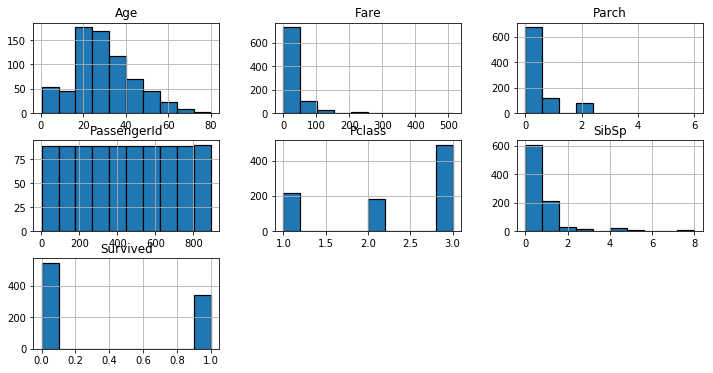

In [ ]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

На графике плотностей распределения четко видны такие распределения, как 


*   Биноминальное распределение ('Survived')
*   Равномерное распределение ('PassengerId')
*   Нормальное ('Age')
*   Логнормальное ('SibSp', 'Fare')


Посмотрим отсутствующие данные:

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


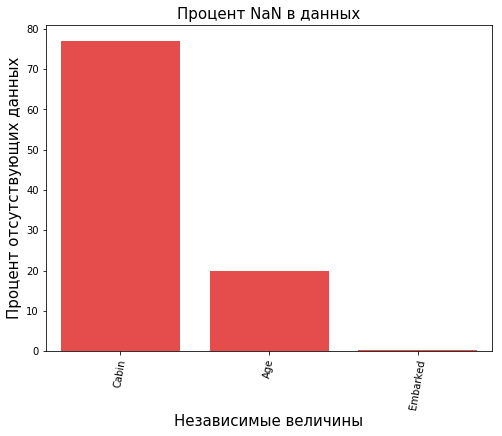

In [ ]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='80')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Независимые величины', fontsize=15)
    plt.ylabel('Процент отсутствующих данных', fontsize=15)
    plt.title('Процент NaN в данных', fontsize=15)
    return ms

missingdata(data)

У нас есть также тестовые данные. Давайте посмотрим, отсутствуют ли в тестовых данных те же самые величины. 

In [ ]:
url='http://yustiks.ru/titanic/test.csv'
s=requests.get(url).content
test=pd.read_csv(io.StringIO(s.decode('utf-8')))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Как можно заметить в тестовых данных нет класса Survived. 

Посмотрим процент отсутствующих данных:

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


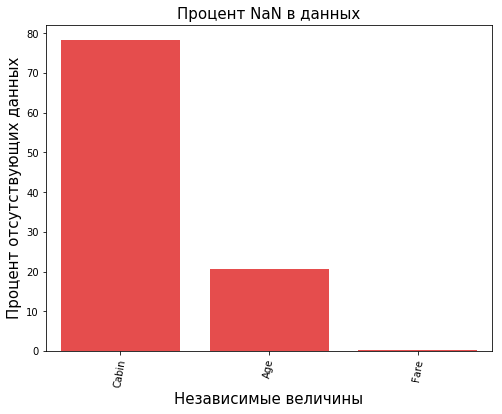

In [ ]:
missingdata(test)

График очень похож на тренировочные данные. Необходимо придумать алгоритм, который поможет избавиться от выбросов. 

Во-первых, посмотрим график встречаемости переменной 'Age':

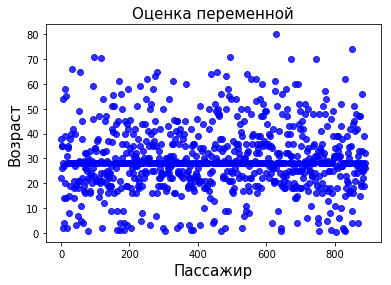

In [ ]:
fig=plt.scatter(data.index, data["Age"],color="blue",alpha=0.8)
plt.xlabel('Пассажир', fontsize=15)
plt.ylabel('Возраст', fontsize=15)
plt.title('Оценка переменной', fontsize=15)
plt.show()

Как вариант, можно заполнить неизвестные данные по правилу медианного фильтра: вместо Nan можно использовать среднее значение (не всегда работает). 

In [ ]:
test['Age'].fillna(test['Age'].median(), inplace = True)
data['Age'].fillna(data['Age'].median(), inplace = True)

То же самое делаем со значением Fare 

In [ ]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)

Нам не нужны значения 'Cabin', так как это просто номер кабины - удаляем колонку

In [ ]:
drop_column = ['Cabin']
data.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

Значение Embarked есть отсутствующие значения в таблице тренировочных данных, но нет в тестовых, поэтому в случае с тестовыми данными мы можем например использовать наиболее встречаемое значение в качестве заполнения неизвестных (так называемую **моду** - значение признака, имеющее наибольшую частоту в статистическом ряду распределения)

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

Проверим, имеются ли отсутствующие значения в данных

In [ ]:
print('train data:')
print(data.isnull().sum())
print('test data:')
print(test.isnull().sum())

train data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Можно сказать, успешно избавились от выбросов путем заполнения данных с помощью :


*   медианы
*   моды



Объединим теперь данные в один вектор для дальнейших действий

In [20]:
a = pd.DataFrame([1,2,3,4])
b = pd.DataFrame([1,2,3,4])


[   0
 0  1
 1  2
 2  3
 3  4,
    0
 0  1
 1  2
 2  3
 3  4]

In [ ]:
all_data=[data,test]

Наверное, нам не нужны имена, но мы можем использовать такие данные, как Miss, Mister, Mademoiselle (эти данные могут говорить о происхождение человека - англичане), поэтому имеет смысл из имен вычленить только значения Miss, 

In [ ]:
import re
# Библиотека re - для применения регулярных выражений
# Let us then extract second word from every row and assign it to a new column. Not only that let us make it categorical (so that we can one-hot encode it) where we observe the most frequent ones.


def title_parser(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # Проверяем если значение есть, то возвращаем его, если нет, то возвращаем ''
    if title_search:
        return title_search.group(1)
    return ""
# Создаем новую колонку 'Title' для титула
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(title_parser)
# Если встречаются непонятные титулы, называем их irrelevant
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'irrelevant')
# Некоторые значения также означают Miss - Mlle, Ms, а вот Mme (Madame) означает Mrs
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

Тренировочные данные

In [ ]:
all_data[0][:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs


Тестовые данные

In [ ]:
all_data[1][:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr


Можно увидеть, что вместе с массивом all_data поменялись значения в массиве data и test - добавилась колонка Title

In [ ]:
data[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs


In [ ]:
test[:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr


На основе имеющихся значений мы можем создать новые: 

In [57]:
df = pd.DataFrame([1,2,3,4,5,6,7,8,9, 10, 11])
df[0] = df[0].apply(pd.to_numeric)


pandas.core.series.Series

In [ ]:
# Создаем новое значение FamilySize как комбинацию SibSp и Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    ## создаем Age_bin для значения age 
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

# Создадим класс для fare 
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

Теперь появились новые колонки, которые также могут нести какой-то смысл (не всегда работает)

In [ ]:
data[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,Adult,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,Adult,median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,Adult,high_fare


Мы можем удалить такие значения как Name и Ticket, так как из Name мы создали категорированные данные (Miss, Mister, Mrs),  а номер билета все равно ни о чем не говорит, поэтому удаляем эти колонки

In [ ]:
for dataset in all_data:
    drop_column = ['Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

Проверяем: колонок стало меньше

In [ ]:
data[:4]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,Adult,Low_fare
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,Adult,high_fare
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,Adult,median_fare
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,Adult,high_fare


Так как у нас получилось много данных категорийных, мы можем заменить эти колонки на вектора **(one-hot encoding)**, таким образом легче для сравнения этих значений

In [52]:
s = pd.concat([pd.Series(list('abc')), pd.Series(list('123'))], axis=1)
s.rename(columns={0: 'col1',1: 'col2'}, inplace=True)
tt = pd.get_dummies(s, columns=['col1'], prefix='Top')

In [ ]:
# Пример pd.dummies 
# s = pd.Series(list('abca'))
# pd.get_dummies(s)
#    a  b  c
# 0  1  0  0
# 1  0  1  0
# 2  0  0  1
# 3  1  0  0
data_new = pd.get_dummies(data, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

test_new = pd.get_dummies(test, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

data_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Sex_female', 'Sex_male', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_irrelevant', 'Age_type_Children',
       'Age_type_Teenage', 'Age_type_Adult', 'Age_type_Elder', 'Em_type_C',
       'Em_type_Q', 'Em_type_S', 'Fare_type_Low_fare', 'Fare_type_median_fare',
       'Fare_type_Average_fare', 'Fare_type_high_fare'],
      dtype='object')

Получилось довольно много переменных, но насколько эти переменные имеют значение? Некоторые переменные можно исключить, так как они не несут никакой информации (сильно кореллированы с другими переменными). Нарисуем матрицу теплоты для того, чтобы показать корелляцию между переменными. Значение корелляции Пирсона в ячейках матрицы говорит о величине корелляции

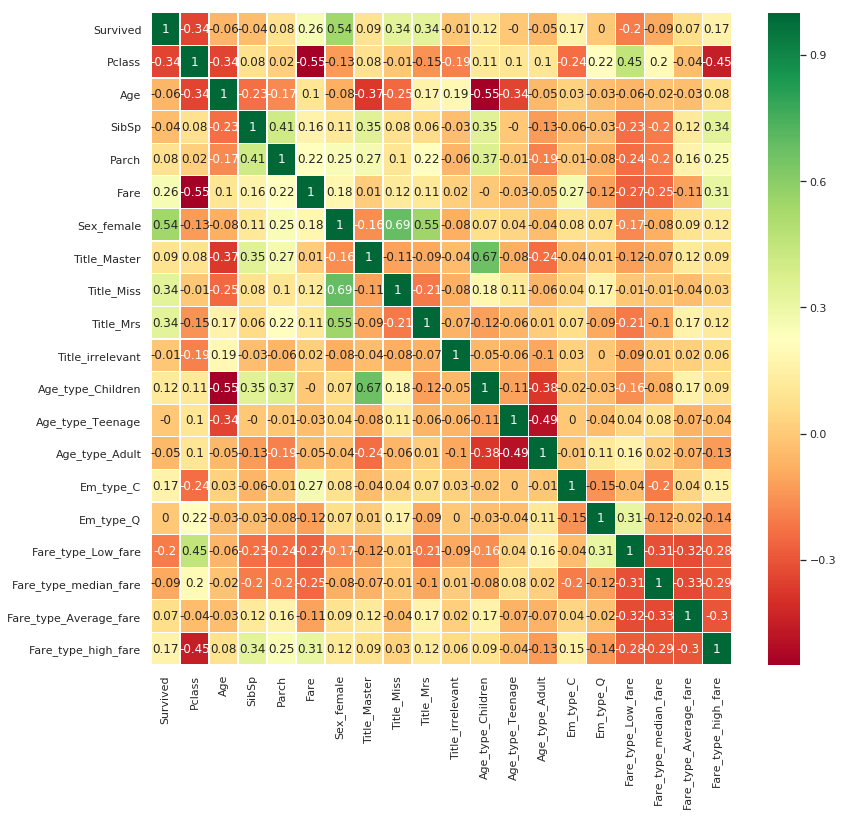

In [ ]:
correlation_matrix = data_new.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

Можно например объединить такие переменные, которые имеют корелляцию больше чем 70% (красные и зеленые ячейки)

In [ ]:
corr_matrix = data_new.corr().abs()

# выбирается верхний треугольник матрицы корелляций (она же симметрична)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# найдем индексы колонок с корелляцией больше чем 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['FamilySize', 'Sex_male', 'Title_Mr', 'Age_type_Elder', 'Em_type_S']


In [ ]:
data_new = data_new.drop(data_new[to_drop], axis=1)
test_new = test_new.drop(test_new[to_drop], axis=1)

In [ ]:
data_new[:2]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Title_Master,Title_Miss,Title_Mrs,Title_irrelevant,Age_type_Children,Age_type_Teenage,Age_type_Adult,Em_type_C,Em_type_Q,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,0,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,1,0,0,0,0,1


Нормирование числовых данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# конвертируем данные Series в Numeric
data_new[['Age','Fare']] = data_new[['Age',"Fare"]].apply(pd.to_numeric)
test_new[['Age','Fare']] = test_new[['Age',"Fare"]].apply(pd.to_numeric)

In [ ]:
# нормализуем данные от 0 до 1
scaler = MinMaxScaler()
data_new[['Age','Fare']] = scaler.fit_transform(data_new[['Age',"Fare"]])
test_new[['Age','Fare']] = scaler.fit_transform(test_new[['Age',"Fare"]])

Удаляем Id пассажира (так как  не несет смысловой нагрузки)

In [ ]:
#удаляем id пассажира
drop_column = ['PassengerId']
data_new.drop(drop_column, axis=1, inplace = True)
train_X = data_new.drop("Survived", axis=1)#колонка Survived идет в новую переменную - Y output
train_Y=data_new["Survived"]
test_X  = test_new.drop("PassengerId", axis=1).copy() 

In [ ]:
train_X.shape, train_Y.shape, test_X.shape

((891, 19), (891,), (418, 19))

# Условная вероятность 

Допустим, дана таблица

In [ ]:
df = pd.DataFrame({'A':['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'], 'B':['one', 'one', 'two', 'three','two', 'two', 'one', 'three'], 'C':np.random.randn(8), 'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.367625,0.444081
1,bar,one,0.306700,1.008371
2,foo,two,1.638652,-0.487655
3,bar,three,-2.392505,-0.717498
4,foo,two,-1.187113,-1.082520
5,bar,two,0.706756,0.127925
6,foo,one,1.280939,-0.187621
7,foo,three,1.378625,-0.157697


Предположим, что нам интересно рассчитать вероятность (y = foo), если x = один: P (y = foo | x = one) =?

Подход 1:
Series.value_counts() - возвращает количество уникальных элементов
count() - количество элементов
groupby() - группируем по значению столбца

In [ ]:
df.groupby('B')['A'].value_counts()/df.groupby('B')['A'].count()

B      A  
one    foo    0.666667
       bar    0.333333
three  bar    0.500000
       foo    0.500000
two    foo    0.666667
       bar    0.333333
Name: A, dtype: float64

Итак, ответ: 0.6667

# Линейная регрессия для датасета "Цены на бостонские дома"

In [43]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')), delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,<!doctype,html><html,"lang=""ru""","class=""is_adaptive""","data-panel-url=""https://server79.hosting.reg.r...","charset=""UTF-8""><meta","name=""viewport""","content=""width=device-width,initial-scale=1""><...","name=""robots""","content=""noindex""><title>Страница",не&nbsp;найдена</title><style,"media=""all"">/*!*******************************...",NaN,NaN
1,!***,css,./node_modules/css-loader/index.js??clonedRule...,***!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\*********************************************...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,.b-page{display:flex;flex-direction:column;wid...,0,0;margin:0;color:#364364;font:12px,"Inter,Arial,Helvetica","Neue,Helvetica,FreeSans,sans-serif;background:...",.b-page{overflow-x:hidden}@media,(min-width:1024px){.is_adaptive,.b-page{overflow-x:hidden}}.b-page_type_parkin...,".b-page_menu-addition_added,html:not(.is_adapt...",.b-page_menu-addition_added-active{padding-top...,(min-width:1024px){.is_adaptive,.b-page_menu-addition_added{padding-top:0}}.b-...,(min-width:1024px){.is_adaptive,.b-page_menu-addition_added-active{padding-top...
4,/*!*******************************************...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

Типы даннных

In [ ]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Посмотрим стандартные характеристики распределение (медиана, мода, минимальное значение, максимальное)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Максимальное значение переменной MEDV = 50. **

Посмотрим выбросы в данных с помощью boxplot

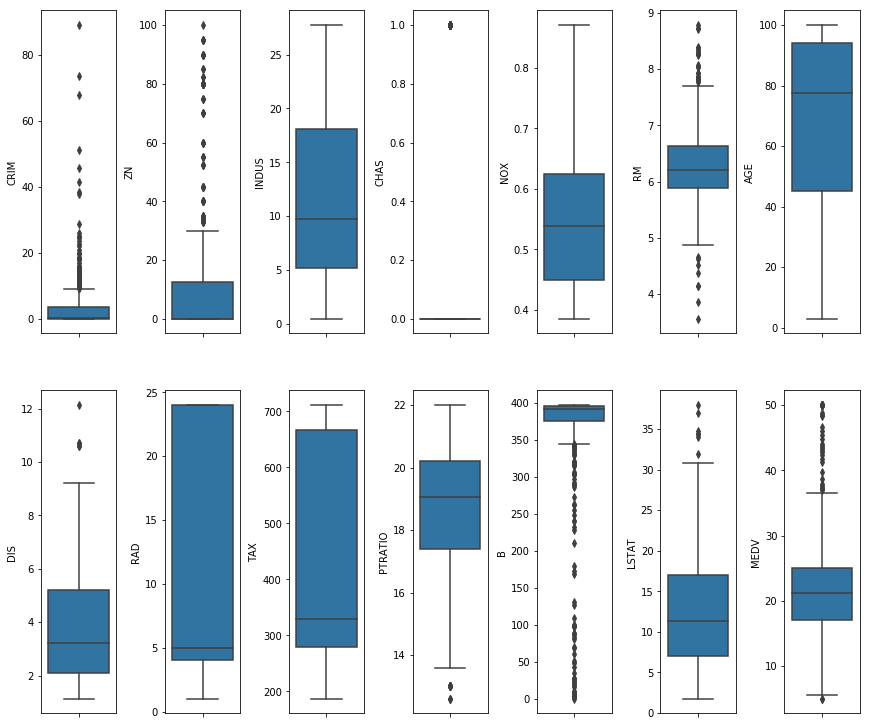

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Можно заметить, что такие значения как CRIM, ZN, RM, B имеют выбросы. 

Посмотрим процент выбросов в данных

In [ ]:
for k, v in data.item():
    q1 = k.quantile(0.25)
    q1 = k.quantile(0.75)
    

In [ ]:
    for k, v in data.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))
    

Выбросы колонки CRIM = 13.04%
Выбросы колонки ZN = 13.44%
Выбросы колонки INDUS = 0.00%
Выбросы колонки CHAS = 100.00%
Выбросы колонки NOX = 0.00%
Выбросы колонки RM = 5.93%
Выбросы колонки AGE = 0.00%
Выбросы колонки DIS = 0.99%
Выбросы колонки RAD = 0.00%
Выбросы колонки TAX = 0.00%
Выбросы колонки PTRATIO = 2.96%
Выбросы колонки B = 15.22%
Выбросы колонки LSTAT = 1.38%
Выбросы колонки MEDV = 7.91%


Так как максимальное значение переменной MEDV = 50, удалим данные, не влияющие на предсказание цен выше 50

In [ ]:
print(np.shape(data))
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(506, 14)
(490, 14)


Посмотрим плотности распределения значений

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(12,10))
fig.set_size_inches(15, 15)
axs = axs.flat
for k, v in data.items():
    sns.distplot(v, ax=axs[indx])
    

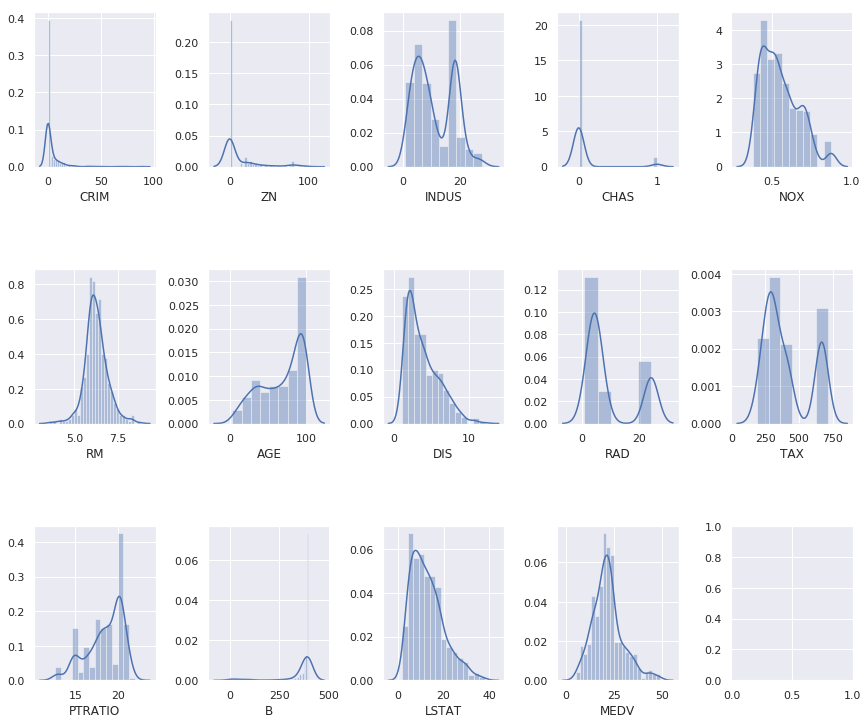

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Такие переменные, как CRIM, ZN, B имеют перекошенное распределение. MEDV похоже на нормальное распределение. 
Другие переменные имеют либо нормальное либо биноминальное распределение, кроме CHAS (дискретная переменная).

Построим график плотности распределения колонки 'MEDV'

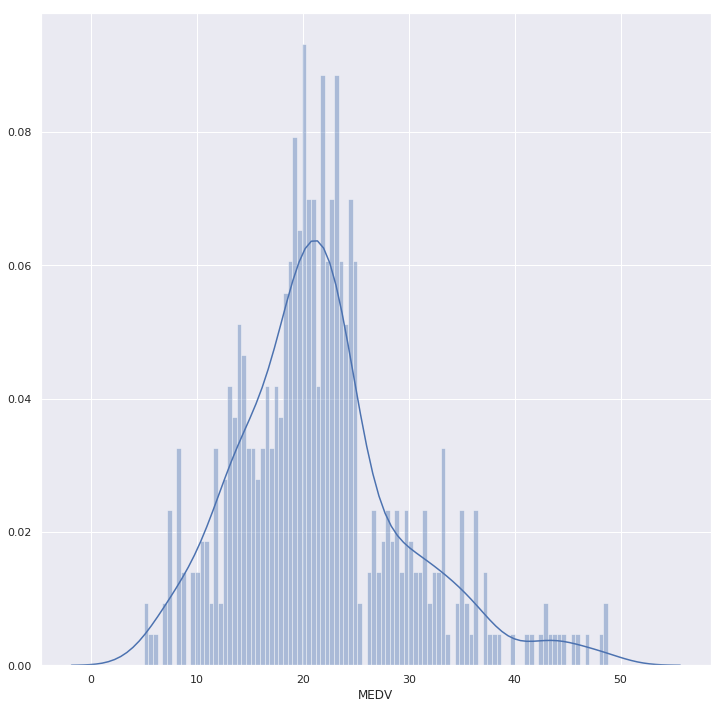

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
sns.distplot(data['MEDV'], bins=100)
plt.show()

Можно заметить, что данные представляют собой нормальное распределение с некоторыми выбросами 

Построим матрицу корелляций

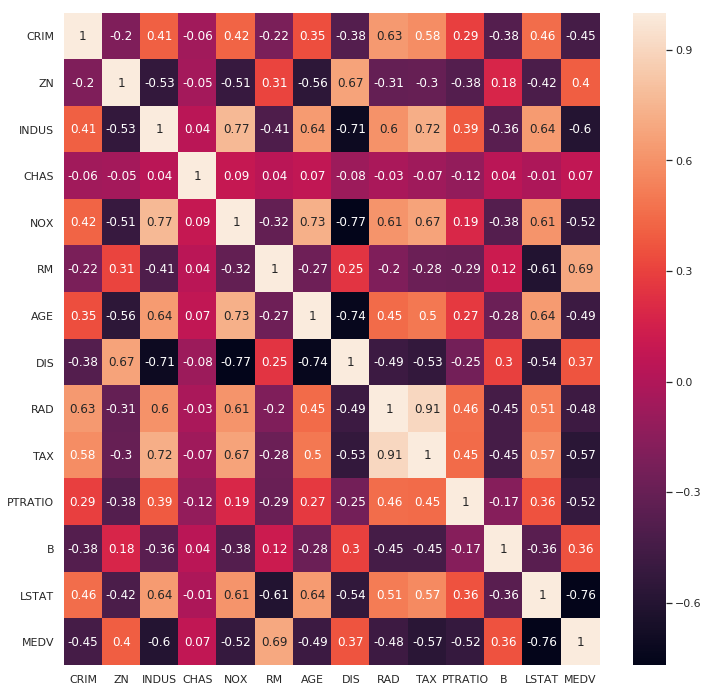

In [ ]:
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
print(sorted(correlation_matrix['MEDV']))

[-0.76, -0.6, -0.57, -0.52, -0.52, -0.49, -0.48, -0.45, 0.07, 0.36, 0.37, 0.4, 0.69, 1.0]


Наша задача - предсказать значение MEDV - средняя цена дома. Чтобы понять, какие переменные влияют на цену дома, посмотрим на корелляцию с данным значением. По сути, нам из таблицы нужны только те переменные, которые кореллируют (положительно или отрицательно) с искомым значением (MEDV). Можно увидеть, что RM имеет положительно высокую корелляцию с MEDV 0.7, вторая величина по корелляции - LTSAT (-0.74). 


*   Надо также проверять переменные на мультиколлинеарность: не стоит выбирать в качестве данных значения с высокой корелляцией. Например, следующими по величине абсолютной корелляции идут значения PTRATIO, INDUS, TAX. Мы можем их всех выбрать в качестве значимых данных, но TAX и INDUS между собой имеют корелляцию 72%, поэтому имеет смысл выбрать одну из них.  


Построим корелляцию  LSTAT, INDUS, RM, TAX, NOX, PTRAIO с MEDV, так как их абсолютное значение корелляции с MEDV более 50%

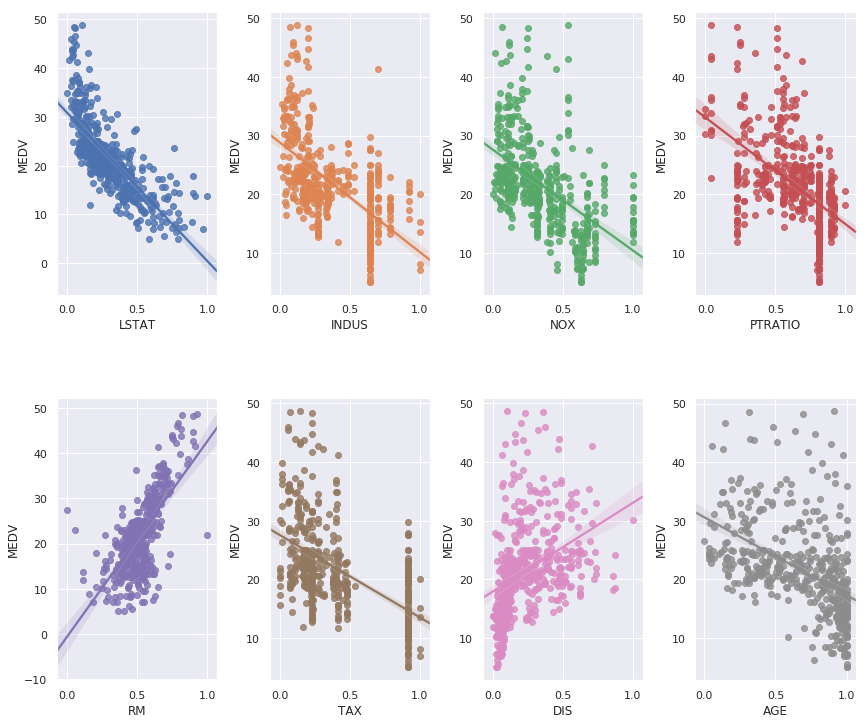

In [ ]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Наблюдения:

*   Линейная зависимость от переменной RM. Есть выбросы
*   Цена уменьшается, если увеличивается значение LSTAT. 
*   Цена увеличивается, если увеличивается RAD, особенно хорошо заметно в среднем значении, но не линейная зависимость, есть выбросы
*   Цена увеличивается, если увеличивается TAX, нелинейная зависимость, есть выбросы



Подводя итоги, мы можем выбрать для предсказания переменной MEDV такие значения, как 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'. 

Перекошенность данных можно убрать с помощью логарифмических преобразований

In [ ]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# Линейная регрессия от одной переменных:

In [ ]:
from sklearn.linear_model import LinearRegression
lstat = x['LSTAT']
medv = data['MEDV']
model = LinearRegression()
result = model.fit(np.array(lstat).reshape(-1,1), medv)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 32.49330636655473
slope: [-42.61078059]


Посмотрим на линейную регрессию от одной переменной:

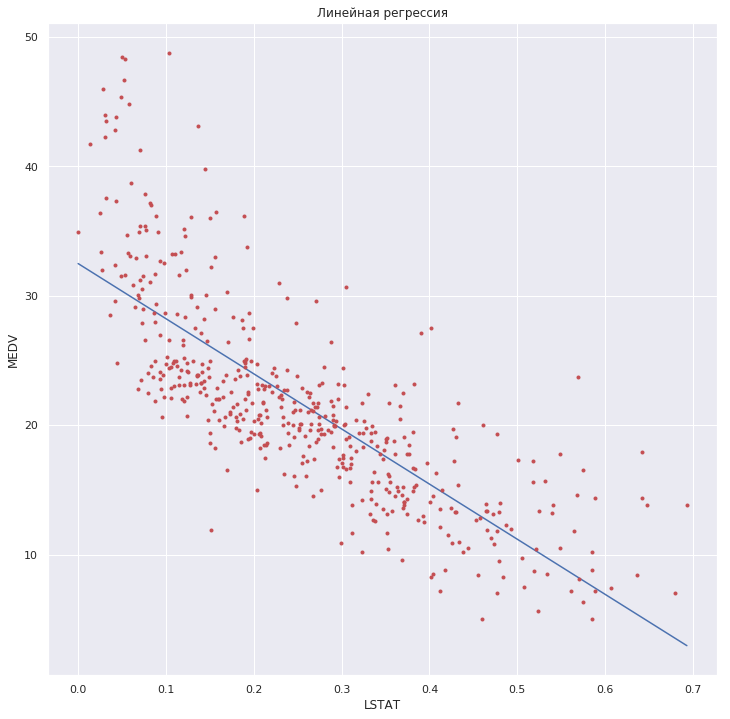

In [ ]:

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия')
x = np.linspace(min(lstat), max(lstat), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(lstat, medv, 'r.')
plt.show()

# Линейная регрессия от нескольких переменных:

'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'

In [ ]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
lstat = x['LSTAT']
indus = x['INDUS']
nox = x['NOX']
ptratio = x['PTRATIO']
rm = x['RM']
tax = x['TAX']
dis = x['DIS']
age = x['AGE']

y = data['MEDV']
x = np.vstack([np.array(lstat), np.array(indus), np.array(nox), 
               np.array(ptratio), np.array(rm), np.array(tax), 
              np.array(dis), np.array(age)]).T
print('x - это многомерная матрица,: ')
print(x[:3])
model = LinearRegression().fit(x, y)

x - это многомерная матрица,: 
[[  4.98     2.31     0.538   15.3      6.575  296.       4.09    65.2   ]
 [  9.14     7.07     0.469   17.8      6.421  242.       4.9671  78.9   ]
 [  4.03     7.07     0.469   17.8      7.185  242.       4.9671  61.1   ]]


In [ ]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 32.04698853519179
slope: [-3.81813356e-01 -9.23073341e-02 -1.11558716e+01 -8.47024012e-01
  4.01294870e+00 -4.97862424e-03 -9.88571701e-01 -2.66668683e-02]


In [ ]:
print('Предсказание модели: ', model.predict(x[0:2]))

Предсказание модели:  [30.10052866 25.14343657]
